In [ ]:
import numpy as np
from keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/tmp/ipython-input-2671005516.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sports_confidences, shade=True, label="Sports Model")
/tmp/ipython-input-2671005516.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(crime_confidences, shade=True, label="Crime Model")


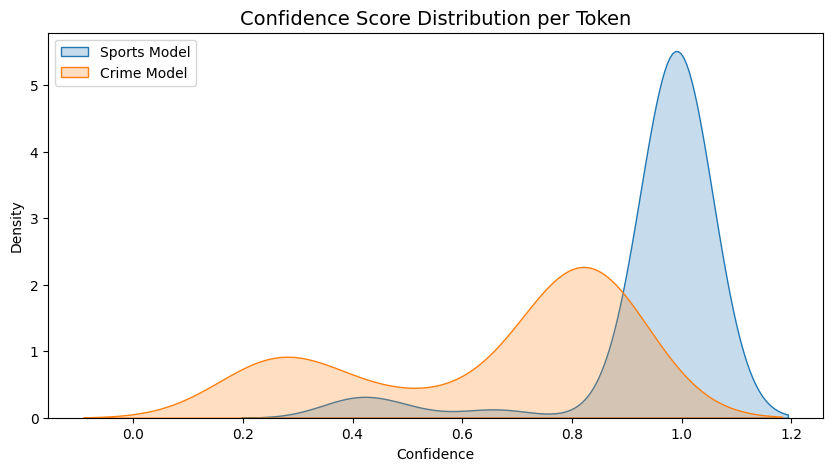

/tmp/ipython-input-2671005516.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tags, order=pd.Series(tags).value_counts().index, palette="Set2")


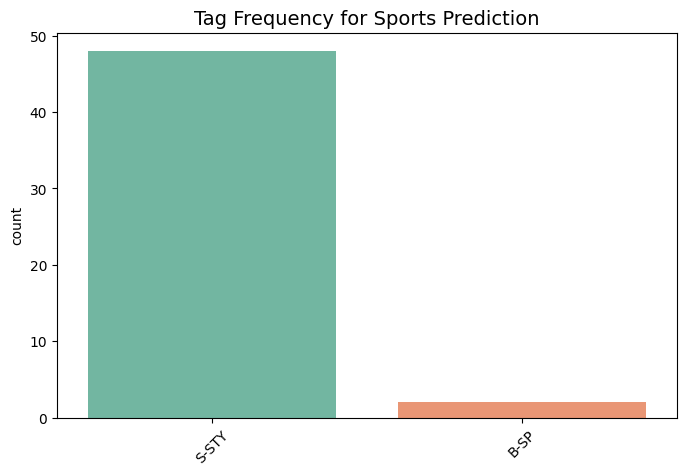

/tmp/ipython-input-2671005516.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tags, order=pd.Series(tags).value_counts().index, palette="Set2")


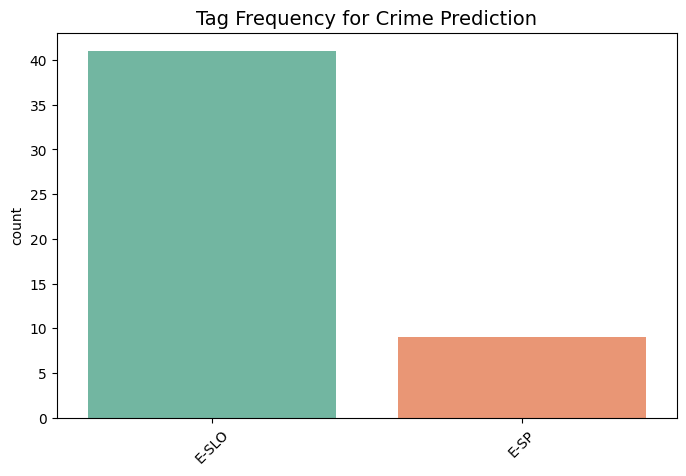

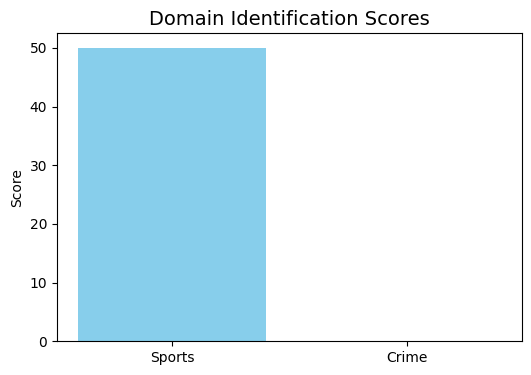

The text belongs to the 'sports' domain.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained BiLSTM models
def load_model(model_path):
    return tf.keras.models.load_model(model_path)

# Preprocess the input text
def preprocess_text(text, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences

def visualize_confidence_scores(sports_entities, crime_entities):
    # visualize
      sports_confidences = [np.max(e) for e in sports_entities]
      crime_confidences = [np.max(e) for e in crime_entities]

      plt.figure(figsize=(10,5))
      sns.kdeplot(sports_confidences, shade=True, label="Sports Model")
      sns.kdeplot(crime_confidences, shade=True, label="Crime Model")
      plt.title("Confidence Score Distribution per Token", fontsize=14)
      plt.xlabel("Confidence")
      plt.ylabel("Density")
      plt.legend()
      plt.show()

def visualize_tag_distribution(tags, domain):
    plt.figure(figsize=(8,5))
    sns.countplot(x=tags, order=pd.Series(tags).value_counts().index, palette="Set2")
    plt.title(f"Tag Frequency for {domain} Prediction", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


def visualize_domain_scores(sports_score, crime_score):
    plt.figure(figsize=(6,4))
    plt.bar(["Sports", "Crime"], [sports_score, crime_score], color=["skyblue", "salmon"])
    plt.title("Domain Identification Scores", fontsize=14)
    plt.ylabel("Score")
    plt.show()
def show_predictions(text, entities, domain):
    words = text.split()
    preds = []
    for w, e in zip(words, entities[:len(words)]):
        preds.append([w, convert_to_tag(e), np.max(e)])
    df = pd.DataFrame(preds, columns=["Word","Predicted Tag","Confidence"])
    print(f"Sample Predictions from {domain} model:")
    print(df.head(15))  # Show first 15 tokens
    return df


# Define the function to identify the domain
def identify_domain(text, sports_bilstm_model, crime_bilstm_model, tokenizer, max_length):
    # Preprocess the text
    preprocessed_text = preprocess_text(text, tokenizer, max_length)

    # Predict entities using both models
    sports_entities = sports_bilstm_model.predict(preprocessed_text)[0]
    crime_entities = crime_bilstm_model.predict(preprocessed_text)[0]

    # Convert predictions to tag sequences
    sports_tags = [convert_to_tag(entity) for entity in sports_entities]
    crime_tags = [convert_to_tag(entity) for entity in crime_entities]

    visualize_confidence_scores(sports_entities, crime_entities)


    # ✅ Visualize distributions
    visualize_tag_distribution(sports_tags, "Sports")
    visualize_tag_distribution(crime_tags, "Crime")


    # Define sports and crime specific tags
    sports_specific_tags = {'B-SLO', 'E-SLO', 'M-SLO', 'S-STY', 'B-STI', 'M-STI', 'E-STI', 'B-SP', 'E-SP', 'O'}
    crime_specific_tags = {'M-LO', 'B-LO', 'E-LO', 'S-TY', 'B-TI', 'M-TI', 'E-TI', 'B-VI', 'E-VI', 'O'}

    # Count occurrences of each tag type
    sports_score = sum([1 for tag in sports_tags if tag in sports_specific_tags])
    crime_score = sum([1 for tag in crime_tags if tag in crime_specific_tags])

    # ✅ Visualize domain scores
    visualize_domain_scores(sports_score, crime_score)

    # Determine domain based on higher score
    if sports_score > crime_score:
        return 'sports'
    else:
        return 'crime'
index_to_tag = {
    0: 'O',        # Outside of a named entity
    1: 'B-SLO',    # Beginning of a sports location
    2: 'M-SLO',    # Inside of a sports location
    3: 'E-SLO',    # End of a sports location
    4: 'S-STY',    # Beginning of a sports type
    5: 'B-SP',     # Beginning of a sports person
    6: 'E-SP',      # End of a sports person
    7: 'B-STI',    # Beginning of a sports team
    8: 'M-STI',    # Inside of a sports team
    9: 'E-STI',   # End of a sports team
    10: 'B-LO',    # Beginning of a crime location
    11: 'M-LO',    # Inside of a crime location
    12: 'E-LO',    # End of a crime location
    13: 'S-TY',    # Beginning of a crime type
    14: 'B-TI',    # Beginning of a crime time
    15: 'M-TI',    # Inside of a crime time
    16: 'E-TI',    # End of a crime time
    17: 'B-VI',    # Beginning of a crime victim
    18: 'E-VI'     # End of a crime victim
}
# Helper function to convert model output to tag
def convert_to_tag(predicted_output):
    # Check if the predicted output is in logits or softmax probabilities
    if isinstance(predicted_output, np.ndarray):
        if len(predicted_output.shape) > 1:
            # If predicted output has a second dimension, assume it's softmax probabilities
            predicted_index = np.argmax(predicted_output)  # Get the index of the highest probability
        else:
            # If it's a 1D array, assume it's logits and apply argmax
            predicted_index = np.argmax(predicted_output)
    else:
        raise ValueError("The predicted output must be a numpy array.")

    # Convert the index to the corresponding tag
    predicted_tag = index_to_tag.get(predicted_index, 'O')  # Default to 'O' if the index is not found

    return predicted_tag

# Example usage
def main():
    # Load the models (replace with the actual path to your models)
    sports_bilstm_model = load_model('/content/drive/MyDrive/NER/model_BiLSTM_Sports_500_final.h5')
    crime_bilstm_model = load_model('/content/drive/MyDrive/NER/model_crime_500_final.h5')

    # Tokenizer and max sequence length (adjust these based on your data)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(["dummy text for fitting tokenizer"])  # Replace with actual data for fitting tokenizer
    max_length = 50  # Use the actual max length that your model was trained on

    # Input text
    input_text = """On March 12, 2024, at Old Trafford in Manchester, Marcus Rashford scored the winning goal as Manchester United
    secured a crucial football victory against Liverpool.Lionel Messi's brilliance on April 22, 2024, at Camp Nou in Barcelona led
    Barcelona to a stunning football victory over Real Madrid in the latest El Clásico. Kylian Mbappe's hat-trick on May 5, 2024,
    at Parc des Princes in Paris helped Paris Saint-Germain (PSG) defeat Lyon in an intense football match."""

    # Identify the domain
    predicted_domain = identify_domain(input_text, sports_bilstm_model, crime_bilstm_model, tokenizer, max_length)
    print(f"The text belongs to the '{predicted_domain}' domain.")

if __name__ == "__main__":
    main()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/tmp/ipython-input-2544249581.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sports_confidences, shade=True, label="Sports Model")
/tmp/ipython-input-2544249581.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(crime_confidences, shade=True, label="Crime Model")


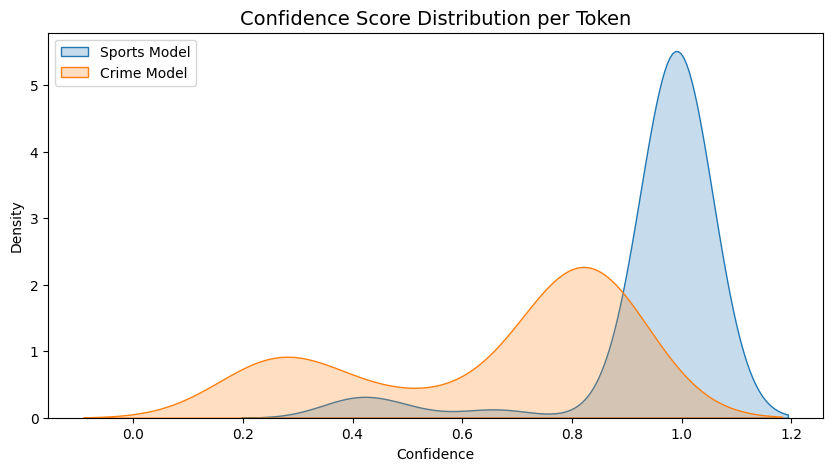

The text belongs to the 'crime' domain.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


# Load the pre-trained BiLSTM models
def load_model(model_path):
    return tf.keras.models.load_model(model_path)

# Preprocess the input text
def preprocess_text(text, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences
def visualize_confidence_scores(sports_entities, crime_entities):
    # visualize
      sports_confidences = [np.max(e) for e in sports_entities]
      crime_confidences = [np.max(e) for e in crime_entities]

      plt.figure(figsize=(10,5))
      sns.kdeplot(sports_confidences, shade=True, label="Sports Model")
      sns.kdeplot(crime_confidences, shade=True, label="Crime Model")
      plt.title("Confidence Score Distribution per Token", fontsize=14)
      plt.xlabel("Confidence")
      plt.ylabel("Density")
      plt.legend()
      plt.show()

def identify_domain(text, sports_bilstm_model, crime_bilstm_model, tokenizer, max_length):
    # Preprocess the text
    preprocessed_text = preprocess_text(text, tokenizer, max_length)

    # Predict entities using both models
    sports_entities = sports_bilstm_model.predict(preprocessed_text)[0]
    crime_entities = crime_bilstm_model.predict(preprocessed_text)[0]

    visualize_confidence_scores(sports_entities, crime_entities)

    # Convert predictions to tag sequences with confidence scores
    sports_confidence_scores = [np.max(entity) for entity in sports_entities]
    crime_confidence_scores = [np.max(entity) for entity in crime_entities]

    # Define sports and crime specific tags
    sports_specific_tags = {'B-SLO', 'E-SLO', 'M-SLO', 'S-STY', 'B-STI', 'M-STI', 'E-STI', 'B-SP', 'E-SP', 'O'}
    crime_specific_tags = {'M-LO', 'B-LO', 'E-LO', 'S-TY', 'B-TI', 'M-TI', 'E-TI', 'B-VI', 'E-VI', 'O'}

    # Calculate weighted scores for each domain
    sports_score = sum([score for tag, score in zip(sports_specific_tags, sports_confidence_scores) if tag in sports_specific_tags])
    crime_score = sum([score for tag, score in zip(crime_specific_tags, crime_confidence_scores) if tag in crime_specific_tags])

    # Determine domain based on higher weighted score
    if sports_score > crime_score:
        return 'sports'
    else:
        return 'crime'

index_to_tag = {
    0: 'O',        # Outside of a named entity
    1: 'B-SLO',    # Beginning of a sports location
    2: 'M-SLO',    # Inside of a sports location
    3: 'E-SLO',    # End of a sports location
    4: 'S-STY',    # Beginning of a sports type
    5: 'B-SP',     # Beginning of a sports person
    6: 'E-SP',      # End of a sports person
    7: 'B-STI',    # Beginning of a sports team
    8: 'M-STI',    # Inside of a sports team
    9: 'E-STI',   # End of a sports team
    10: 'B-LO',    # Beginning of a crime location
    11: 'M-LO',    # Inside of a crime location
    12: 'E-LO',    # End of a crime location
    13: 'S-TY',    # Beginning of a crime type
    14: 'B-TI',    # Beginning of a crime time
    15: 'M-TI',    # Inside of a crime time
    16: 'E-TI',    # End of a crime time
    17: 'B-VI',    # Beginning of a crime victim
    18: 'E-VI'     # End of a crime victim
}

# Helper function to convert model output to tag
def convert_to_tag(predicted_output):
    # Check if the predicted output is in logits or softmax probabilities
    if isinstance(predicted_output, np.ndarray):
        if len(predicted_output.shape) > 1:
            # If predicted output has a second dimension, assume it's softmax probabilities
            predicted_index = np.argmax(predicted_output)  # Get the index of the highest probability
        else:
            # If it's a 1D array, assume it's logits and apply argmax
            predicted_index = np.argmax(predicted_output)
    else:
        raise ValueError("The predicted output must be a numpy array.")

    # Convert the index to the corresponding tag
    predicted_tag = index_to_tag.get(predicted_index, 'O')  # Default to 'O' if the index is not found

    return predicted_tag

# Example usage
def main():
    # Load the models (replace with the actual path to your models)
    sports_bilstm_model = load_model('/content/drive/MyDrive/NER/model_BiLSTM_Sports_500_final.h5')
    crime_bilstm_model = load_model('/content/drive/MyDrive/NER/model_crime_500_final.h5')

    # Tokenizer and max sequence length (adjust these based on your data)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(["dummy text for fitting tokenizer"])  # Replace with actual data for fitting tokenizer
    max_length = 50  # Use the actual max length that your model was trained on

    # Input text
    input_text = """On 12th August 2023, a 12-year-old boy named Tim was kidnapped near Central Park, New York.
    A woman named Sarah was abducted from her home in Los Angeles on the evening of July 14, 2022."""

    # Identify the domain
    predicted_domain = identify_domain(input_text, sports_bilstm_model, crime_bilstm_model, tokenizer, max_length)
    print(f"The text belongs to the '{predicted_domain}' domain.")

if __name__ == "__main__":
    main()

In [ ]:


def visualize_confidence_scores(sports_entities, crime_entities):
    sports_confidences = [np.max(e) for e in sports_entities]
    crime_confidences = [np.max(e) for e in crime_entities]

    plt.figure(figsize=(10,5))
    sns.kdeplot(sports_confidences, shade=True, label="Sports Model")
    sns.kdeplot(crime_confidences, shade=True, label="Crime Model")
    plt.title("Confidence Score Distribution per Token", fontsize=14)
    plt.xlabel("Confidence")
    plt.ylabel("Density")
    plt.legend()
    plt.show()